In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


In [94]:
data = pd.read_csv(r"C:\Users\ethan\Downloads\Wine_clust .csv")

In [95]:
data.head(10)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


In [96]:
data.isnull().sum().sum()

0

### Performing PCA to reduce the features. 

#### Before PCA we need to scale our data. 

In [97]:
from sklearn.preprocessing import StandardScaler
data = StandardScaler().fit_transform(data)

In [98]:
data.shape

(178, 13)

In [99]:
# importing PCA
from sklearn.decomposition import PCA
rdcd_data = PCA(n_components= 0.95).fit_transform(data)

In [100]:
rdcd_data.shape

(178, 10)

In [101]:
print('Columns before',data.shape[1],'.')
print('Columns after',rdcd_data.shape[1],'.')

Columns before 13 .
Columns after 10 .


In [102]:
#finding the cumulative sum.
rdcd_data_temp = PCA(n_components= 0.95).fit(data)
np.cumsum(rdcd_data_temp.explained_variance_ratio_)[-1]

0.9616971684450645

# Performing KMeans clustering

### Finding the perfect number of clusters with the help of WCSS

In [103]:
from sklearn.cluster import KMeans

In [104]:
wcss = []
for i in range(1,16):
    kmcl = KMeans(n_clusters= i, init= 'k-means++', n_init=10, random_state= 46)
    kmcl.fit(rdcd_data)
    wcss.append(kmcl.inertia_)

##### Plotting Elbow graph

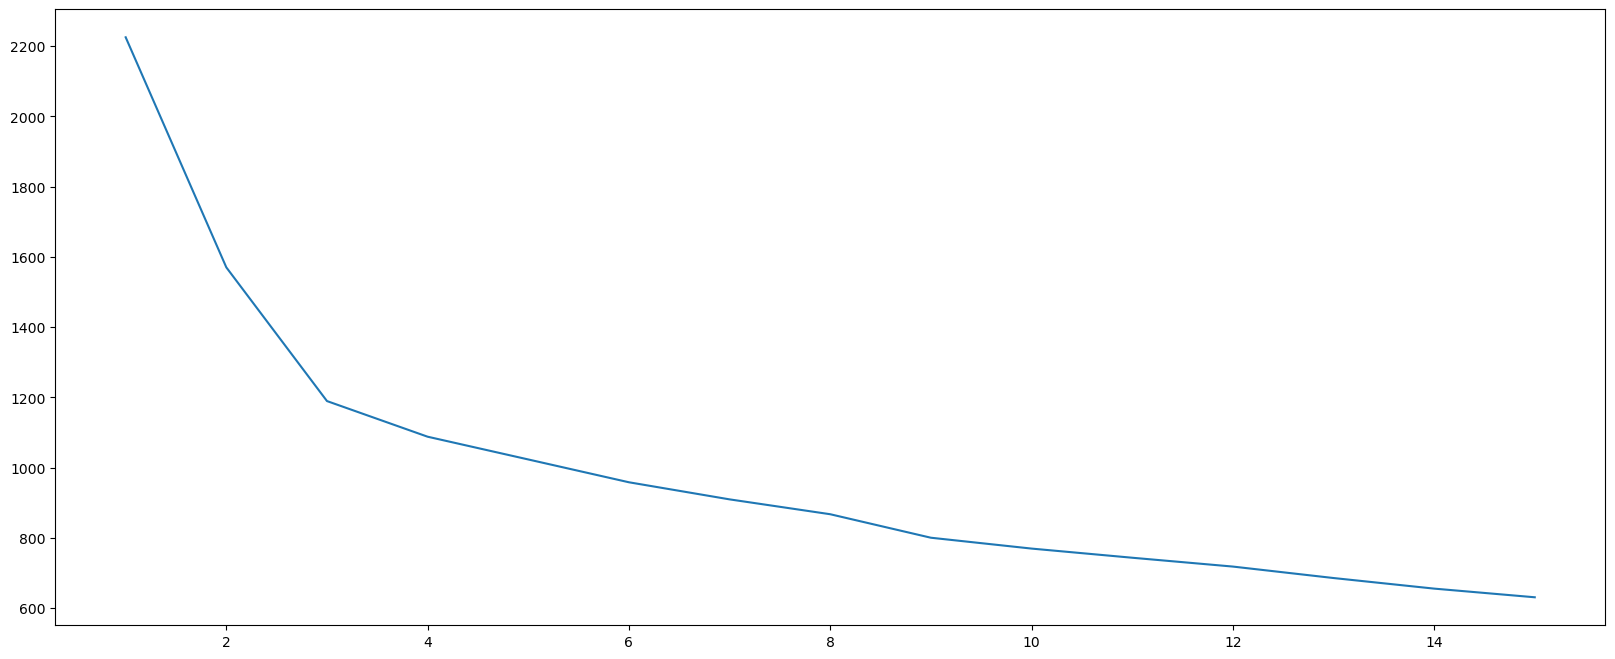

In [105]:
plt.figure(figsize=(20,8))
plt.plot(range(1,16), wcss)

#### From the elbow graph it is clear that a cluster number of 3 is perfect for this particular dataset.

In [106]:
kmcl = KMeans(n_clusters= 3, init= 'k-means++', n_init=10, random_state= 46)
kmclpred = kmcl.fit_predict(rdcd_data)
kmclpred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

#### Finding the Silhouette and Calinski Harabasz score.

In [107]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score
silscrN3 = silhouette_score(rdcd_data,kmclpred)
calinskiscrN3 = calinski_harabasz_score(rdcd_data,kmclpred)
print('Silhouette score is',silscrN3,'and Calinski score is', calinskiscrN3)

Silhouette score is 0.298674829436929 and Calinski score is 76.17957977418838


In [108]:
#testing another cluster value, n_cluster = 4
kmcl = KMeans(n_clusters= 4, init= 'k-means++', n_init=10, random_state= 46)
kmclpredN4 = kmcl.fit_predict(rdcd_data)
silscrN4 = silhouette_score(rdcd_data,kmclpredN4)
calinskiN4 = calinski_harabasz_score(rdcd_data,kmclpredN4)
print('Silhouette score is',silscrN4,'and Calinski score is', calinskiN4)


Silhouette score is 0.2722814365766535 and Calinski score is 60.613006410792536


#### So it is evident form the scores that a cluster number of 3 is best.

# Performing AHC

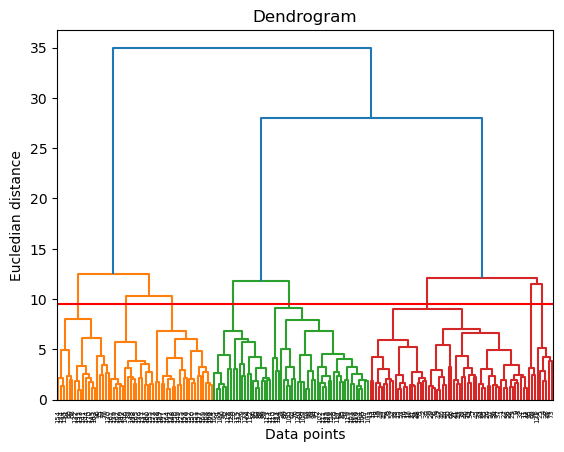

In [109]:
from scipy.cluster import hierarchy
dnd = hierarchy.dendrogram(hierarchy.linkage(rdcd_data, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Data points')
plt.ylabel('Eucledian distance')
plt.axhline(9.5, c = 'red')
plt.show()

In [110]:
from sklearn.cluster import AgglomerativeClustering
agcl = AgglomerativeClustering(n_clusters=3, metric= 'euclidean', linkage = 'ward')

In [111]:
agclpred = agcl.fit_predict(rdcd_data)
agclpred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 2, 2, 2, 2,
       1, 2, 0, 1, 0, 1, 2, 1, 2, 0, 2, 0, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [112]:
agclsilh = silhouette_score(rdcd_data, agclpred)
agclsilh

0.2839520778138408

In [113]:
agcltemp = AgglomerativeClustering(n_clusters=5, metric= 'euclidean', linkage = 'ward')
agclpredtemp = agcltemp.fit_predict(rdcd_data)
agclsilhtemp = silhouette_score(rdcd_data, agclpredtemp)
agclsilhtemp

0.2237821350841441

In [164]:
len(np.unique(agclpred))

3

### Number of clusters for AHC is 3

# Performing DBSCAN Clustering


Tried finding a best esp and min_samples, but failed miserably. 

In [23]:
#creating a model and mentioning the parameters
#eps = np.arange(2,6)
#min_samples = np.arange(2,15,2)
#model = DBSCAN()
#esp_val=[]
#min_val=[]
#silscr =[]
#for e in eps:
#    min_temp = np.arange(1,e)
#    for m in min_temp:
#        dbscan = DBSCAN(eps = e, min_samples= e)
#        dbscan.fit(rdcd_data)
#        labels = dbscan.labels_
#        sil=silhouette_score(rdcd_data,labels)
#        silscr.append(sil)
#        min_val.append(m)
#    esp_val.append(e)


In [114]:
from sklearn.cluster import DBSCAN

In [148]:
dbscan = DBSCAN(eps =2, min_samples= 5)
dbscan.fit(rdcd_data)
labels = dbscan.labels_
labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,
        0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0, -1,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1,  0,  0, -1,  0,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1,  0, -1, -1,  0,  0,
        0,  0,  0, -1,  0,  0,  0,  0, -1,  0, -1,  0,  0, -1,  0,  0, -1,
        0,  0, -1, -1, -1, -1,  0,  0, -1,  0, -1, -1,  1,  1,  1, -1, -1,
       -1, -1,  1,  2,  2,  1,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1, -1,  1,  1, -1, -1, -1,  1,  2,  2,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1, -1, -1], dtype=int64)

In [163]:
#creating a sperate array with same dimension as the labels array
temp_column = np.zeros_like(labels, dtype=bool)

In [162]:
# Assigning True for values other than -1
temp_column[dbscan.core_sample_indices_] = True

In [151]:
clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(clusters)

3


In [152]:
print(silhouette_score(rdcd_data, labels))

0.052875912054019036


### Number of clusters formed by DBSCAN is 3